## Исследование закономерностей развития стартапов и моделирование вероятности их закрытия

###  Цель исследований

   Целью проекта является выявление степени влияние различных факторов на жизнеспособность стартапов, а также построение ML-модели для предстказания
вероятности закрытия стартапов.

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка и предобработка данных](#start)
2. [Исследовательский анализ данных](#start1)
3. [Отбор и кодирование признаков для моделирования](#start2)
4. [Обучение моделей](#start3)
5. [Выводы](#start4)

In [155]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlencode 
from scipy import stats as st
import statistics as stat
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
import numpy as np
import scipy.stats as st
from scipy.stats import spearmanr
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
import shap
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from numpy import median, mean
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
import statistics as stat
from scipy.optimize import curve_fit 
import ydata_profiling
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import PyQt6
import matplotlib

## Загрузка и предобработка данных
   <a id="start"></a>

In [2]:
df_train = pd.read_csv('C:\\Users\\79284\\Downloads\\kaggle_startups_train_28062024.csv')
df_train[:5]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


In [4]:
df_train.duplicated().sum()

0

In [5]:
df_test = pd.read_csv('C:\\Users\\79284\\Downloads\\kaggle_startups_test_28062024.csv')
df_test[:5]

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [7]:
df_test.duplicated().sum()

0

<div class="alert alert-info">
   После изучения трейновых и тестовых данных видно, что все типы данных, кроме даты (поля first_funding_at и last_funding_at) указаны верно. Во всех
полях, кроме дат, времени жизни компании и числа раундов  инвестирования, есть пропуски. В трейновых данных есть поле closed_at, которое отсутствует в 
тестовых данных. С другой стороны, в тестовых данных есть поле lifetime (время жизни компании в днях), которого нет в трейновом датасете. 
   Дубликаты данных в обоих датасетах отсутствауют.
</div>

In [8]:
df_train['first_funding_at'] = pd.to_datetime(df_train['first_funding_at'])

In [9]:
df_train['last_funding_at'] = pd.to_datetime(df_train['last_funding_at'])

In [10]:
df_test['first_funding_at'] = pd.to_datetime(df_test['first_funding_at'])

In [11]:
df_test['last_funding_at'] = pd.to_datetime(df_test['last_funding_at'])

In [12]:
df_train['closed_at'] = pd.to_datetime(df_train['closed_at'])

In [13]:
df_train['founded_at'] = pd.to_datetime(df_train['founded_at'])

In [14]:
df_train['lifetime'] =(df_train['closed_at'] - df_train['founded_at']) / np.timedelta64 ( 1 , 'D')

In [15]:
f =  pd.to_datetime('2018-12-31')

In [16]:
df_train.loc[df_train['lifetime'].isna(), 'lifetime'] = (f - df_train['founded_at']) / np.timedelta64 ( 1 , 'D')

In [17]:
df_train['intime'] =(df_train['last_funding_at'] - df_train['first_funding_at']) / np.timedelta64 ( 1 , 'D')

In [18]:
df_test['intime'] =(df_test['last_funding_at'] - df_test['first_funding_at']) / np.timedelta64 ( 1 , 'D')

<div class="alert alert-info">
   Поля с датами в трейновом и тестовом датасетах переведены в тип datetime. В трейновом датасете создано поле lifetime, определяющее число дней 
жизни компании.
</div>

In [19]:
h = ['category_list', 'status', 'country_code', 'state_code', 'region', 'city']

In [20]:
for i in h:
    print(df_train[i].unique())

['Online Reservations|Restaurants' 'Manufacturing|Medical|Medical Devices'
 'Biotechnology' ... 'Gambling|Games|Online Gaming|Sports'
 'Aerospace|Mobile|Transportation|Travel'
 'Online Rental|Parking|Price Comparison']
['operating' 'closed']
['CHE' 'USA' nan 'GBR' 'RUS' 'ESP' 'FRA' 'SWE' 'IND' 'KOR' 'AUS' 'TWN'
 'CHN' 'HUN' 'CAN' 'FIN' 'BRA' 'EGY' 'PRT' 'ISR' 'CHL' 'SVK' 'NLD' 'ARG'
 'ARE' 'JPN' 'IRL' 'DEU' 'LBN' 'EST' 'IDN' 'BEL' 'MEX' 'DNK' 'ITA' 'GRC'
 'ROM' 'TUR' 'SGP' 'SAU' 'MYS' 'NGA' 'QAT' 'VNM' 'BGR' 'GHA' 'UGA' 'JOR'
 'AUT' 'PAK' 'NZL' 'HKG' 'ZAF' 'LVA' 'NOR' 'HRV' 'VEN' 'PER' 'LUX' 'SVN'
 'POL' 'PHL' 'NIC' 'CZE' 'ISL' 'PAN' 'URY' 'BGD' 'MCO' 'GTM' 'THA' 'TTO'
 'UKR' 'KEN' 'CRI' 'DZA' 'LTU' 'CYM' 'MUS' 'BLR' 'SLV' 'COL' 'MLT' 'PSE'
 'BLZ' 'CYP' 'MMR' 'MKD' 'KHM' 'GIB' 'SRB' 'DOM' 'BWA' 'BLM' 'PRY' 'BMU'
 'TAN' 'LIE' 'GRD' 'UZB' 'GEO' 'SEN' 'ALB' 'ECU' 'MOZ' 'LKA' 'LAO' 'TUN'
 'HND' 'ZWE' 'BAH' 'MDA' 'MAF' 'BHR' 'AZE' 'MAR' 'KWT' 'IRN' 'GGY' 'KNA'
 'PRI' 'OMN' 'KAZ' 'JAM' 'NPL'

In [21]:
df_train_s = df_train.dropna(subset=['category_list'])

In [22]:
df_train_s['category_list'].isna().sum()

0

In [23]:
df_train_s['category_list'].unique()[:50]

array(['Online Reservations|Restaurants',
       'Manufacturing|Medical|Medical Devices', 'Biotechnology',
       'Health Care', 'Manufacturing', 'Mobile',
       'Analytics|Business Analytics|Social CRM|Social Media Monitoring|Software',
       'Software', 'Semiconductors', 'Clean Technology',
       'Nanotechnology|Technology|Wine And Spirits',
       'Customer Service|Delivery|Retail',
       'Analytics|Cloud Data Services|Computers|Networking|Software',
       'Banking|Finance|Loyalty Programs', 'Messaging', 'Consumers',
       'Generation Y-Z|Photo Sharing|Social Media',
       'College Recruiting|Enterprise Software|Recruiting|SaaS|Social Recruiting|Software',
       'Technology', 'Finance|Financial Services|Payments',
       'Cloud Computing|Enterprise Resource Planning|Manufacturing|Software',
       'DIY|Environmental Innovation', 'Entertainment|Games',
       'Internet|Pets|Services', 'Advertising|Sales and Marketing',
       'Fitness|Sports', 'Consumer Goods|Food Processing|

In [24]:
df_train['funding_total_usd'].corr(df_train['funding_rounds'])

0.11826249398766586

In [25]:
len(df_train['category_list'].unique())

22106

In [26]:
def f(g):
    g = str(g).split('|')
    return g[-1]
df_train['category_list'] = df_train['category_list'].apply(f)

In [27]:
len(df_train['category_list'].unique())

732

In [28]:
def f(g):
    g = str(g).split(' ')
    return g[-1]
df_train['category_list'] = df_train['category_list'].apply(f)

In [29]:
len(df_train['category_list'].unique())

495

In [30]:
df_train.loc[df_train['category_list'].isna(), 'category_list'] = str(df_train['category_list'].mode())

In [31]:
df_train['category_list'].isna().sum()

0

<div class="alert alert-info">
     В поле category_list трейновой выборки количество уникальных объектов сокращено с 22016 до 495. Пропуски заполнены модой.
</div>

In [32]:
len(df_test['category_list'].unique())

6207

In [33]:
def f(g):
    g = str(g).split('|')
    return g[-1]
df_test['category_list'] = df_test['category_list'].apply(f)

In [34]:
len(df_test['category_list'].unique())

571

In [35]:
def f(g):
    g = str(g).split(' ')
    return g[-1]
df_test['category_list'] = df_test['category_list'].apply(f)

In [36]:
len(df_test['category_list'].unique())

400

In [37]:
df_test.loc[df_test['category_list'].isna(), 'category_list'] = str(df_test['category_list'].mode())

In [38]:
df_test['category_list'].isna().sum()

0

<div class="alert alert-info">
     В поле category_list тестовой выборки количество уникальных объектов сокращено с 6207 до 400. Пропуски заполнены модой.
</div>

In [39]:
for i in df_train['category_list'].unique():
    df_train.loc[(df_train['category_list'] == i) & (df_train['funding_total_usd'].isna()), 'funding_total_usd'] = df_train.loc[df_train['category_list'] == i, 'funding_total_usd'].mean()

In [40]:
df_train['funding_total_usd'].isna().sum()

14

<div class="alert alert-info">
    Пропуски в поле funding_total_usd трейновой выборки были заполнены средними значениями, определенными для каждой категории. После этого осталось 
14 пропусков.
</div>

In [41]:
df_train['funding_total_usd'].corr(df_train['funding_rounds'])

0.11505477055465645

In [42]:
df_train_s = df_train.dropna(subset=['funding_total_usd'])

In [43]:
def mop(values_x,a,b):
    return a * values_x + b 
values_x = df_train_s['funding_rounds']
values_y = df_train_s['funding_total_usd']
args_1, covar = curve_fit(mop, values_x, values_y)
args_1[0], args_1[1]

(14088987.71936495, -6605287.270234543)

In [44]:
df_train.loc[df_train['funding_total_usd'].isna(), 'funding_total_usd'] = df_train.loc[df_train['funding_total_usd'].isna(), 'funding_rounds']*args_1[0]+args_1[1]

In [45]:
df_train['funding_total_usd'].isna().sum()

0

<div class="alert alert-info">
    Оставшиеся пропуски в поле funding_total_usd были заполнены на основании выявленной слабой корреляции между полями funding_total_usd и 
funding_rounds.
</div>

In [46]:
for i in df_test['category_list'].unique():
    df_test.loc[(df_test['category_list'] == i) & (df_test['funding_total_usd'].isna()), 'funding_total_usd'] = df_test.loc[df_test['category_list'] == i, 'funding_total_usd'].mean()

In [47]:
df_test['funding_total_usd'].isna().sum()

14

<div class="alert alert-info">
    Пропуски в поле funding_total_usd тестовой выборки были заполнены средними значениями, определенными для каждой категории. После этого осталось 
14 пропусков.
</div>

In [48]:
df_test['funding_total_usd'].corr(df_test['funding_rounds'])

0.20794580931040196

In [49]:
df_test_s = df_test.dropna(subset=['funding_total_usd'])

In [50]:
def mop(values_x,a,b):
    return a * values_x + b 
values_x = df_test_s['funding_rounds']
values_y = df_test_s['funding_total_usd']
args_1, covar = curve_fit(mop, values_x, values_y)
args_1[0], args_1[1]

(13060623.82238849, -6219215.264295204)

In [51]:
df_test.loc[df_test['funding_total_usd'].isna(), 'funding_total_usd'] = df_test.loc[df_test['funding_total_usd'].isna(), 'funding_rounds']*args_1[0]+args_1[1]

In [52]:
df_test['funding_total_usd'].isna().sum()

0

<div class="alert alert-info">
    Оставшиеся пропуски в поле funding_total_usd тестовой выборки были заполнены на основании выявленной слабой корреляции между полями 
funding_total_usd и funding_rounds.
</div>

In [53]:
df_train['lifetime'].corr(df_train['funding_rounds'])

0.14769933448520148

In [54]:
len(df_train['country_code'].unique())

135

In [55]:
df_train_c = df_train.dropna(subset=['country_code'])

In [56]:
for i in df_train_c['country_code'].unique():
    df_c = df_train_c.loc[df_train_c['country_code'] == i]
    df_train.loc[(df_train['country_code'].isna()) & (df_train['state_code'].isin(df_c['state_code'])), 'country_code'] = i

In [57]:
df_train['country_code'].isna().sum()

0

In [58]:
df_test_c = df_test.dropna(subset=['country_code'])

In [59]:
for i in df_test_c['country_code'].unique():
    df_c = df_test_c.loc[df_test_c['country_code'] == i]
    df_test.loc[(df_test['country_code'].isna()) & (df_test['state_code'].isin(df_c['state_code'])), 'country_code'] = i

In [60]:
df_test['country_code'].isna().sum()

0

<div class="alert alert-info">
    В трейновой и тестовой выборках пропуски в поле country_code были заполнены на основании известных значений в поле state_code, соотвествующих
данному значению в поле country_code.
</div>

In [61]:
df_train['state_code'].isna().sum()

6763

In [62]:
df_train_st = df_train.dropna(subset=['state_code'])

In [63]:
for i in df_train_st['state_code'].unique():
    df_s = df_train_st.loc[df_train_st['state_code'] == i]
    df_train.loc[(df_train['state_code'].isna()) & (df_train['region'].isin(df_s['region'])), 'state_code'] = i

In [64]:
df_train['state_code'].isna().sum()

628

In [65]:
for i in df_train['country_code'].unique():
    df_train.loc[(df_train['country_code'] == i) & (df_train['state_code'].isna()), 'state_code'] = str(df_train_st.loc[df_train_st['country_code'] == i, 'state_code'].mode())

In [66]:
df_train['state_code'].isna().sum()

0

In [67]:
df_test['state_code'].isna().sum()

1695

In [68]:
df_test_st = df_test.dropna(subset=['state_code'])

In [69]:
for i in df_test_st['state_code'].unique():
    df_s = df_test_st.loc[df_test_st['state_code'] == i]
    df_test.loc[(df_test['state_code'].isna()) & (df_test['region'].isin(df_s['region'])), 'state_code'] = i

In [70]:
df_test['state_code'].isna().sum()

167

In [71]:
for i in df_test['country_code'].unique():
    df_test.loc[(df_test['country_code'] == i) & (df_test['state_code'].isna()), 'state_code'] = str(df_test_st.loc[df_test_st['country_code'] == i, 'state_code'].mode())

In [72]:
df_test['state_code'].isna().sum()

0

<div class="alert alert-info">
    В трейновой и тестовой выборках пропуски в поле state_code были заполнены на оснговании соответствия значениям в поле region. Это позволило снизить
число пропусков в 10 раз. Оставшиеся пропуски заполены модой для соответствующих значений в поле country_code.
</div>

In [73]:
for i in df_train['country_code'].unique():
    df_train.loc[(df_train['country_code'] == i) & (df_train['region'].isna()), 'region'] = str(df_train_st.loc[df_train_st['country_code'] == i, 'region'].mode())

In [74]:
df_train['region'].isna().sum()

0

In [75]:
for i in df_train['country_code'].unique():
    df_train.loc[(df_train['country_code'] == i) & (df_train['city'].isna()), 'city'] = str(df_train_st.loc[df_train_st['country_code'] == i, 'city'].mode())

In [76]:
df_train['city'].isna().sum()

0

In [77]:
df_train.isna().sum()

name                     1
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
lifetime                 0
intime                   0
dtype: int64

In [78]:
for i in df_test['country_code'].unique():
    df_test.loc[(df_test['country_code'] == i) & (df_test['region'].isna()), 'region'] = str(df_test_st.loc[df_test_st['country_code'] == i, 'region'].mode())

In [79]:
df_train['region'].isna().sum()

0

In [80]:
for i in df_test['country_code'].unique():
    df_test.loc[(df_test['country_code'] == i) & (df_test['city'].isna()), 'city'] = str(df_test_st.loc[df_test_st['country_code'] == i, 'city'].mode())

In [81]:
df_test['city'].isna().sum()

0

In [82]:
df_test.isna().sum()

name                 0
category_list        0
funding_total_usd    0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
first_funding_at     0
last_funding_at      0
lifetime             0
intime               0
dtype: int64

<div class="alert alert-info">
    В трейновой и тестовой выборках пропуски в полях region и city были заполнены модами для соотвествующих значений поля country_code.
</div>

## Исследовательский анализ данных
   <a id="start1"></a>

In [83]:
df_train['funding_total_usd'].max()

30079503000.0

In [84]:
df_train['lifetime'].max()

17742.0

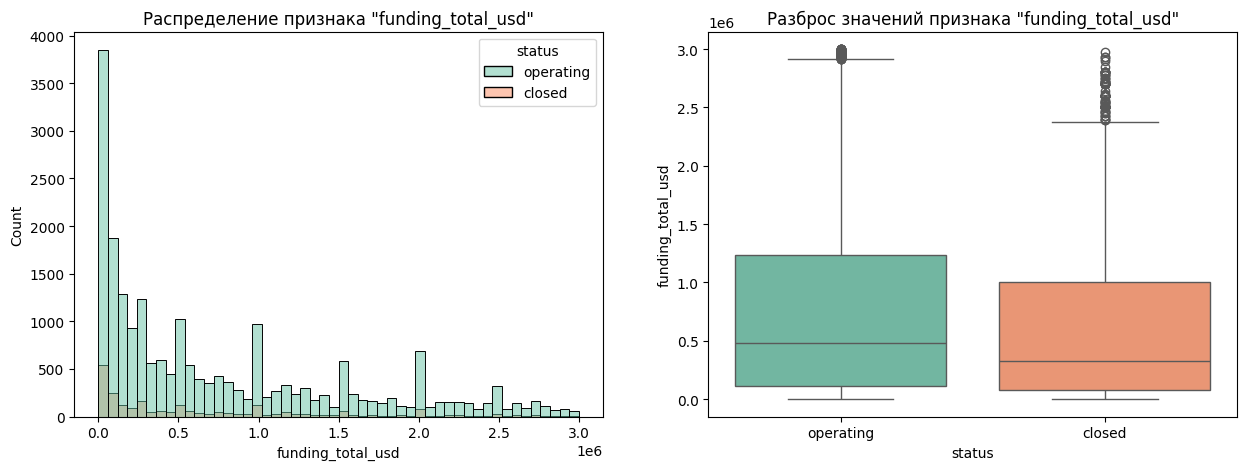

In [85]:
h = ['funding_total_usd', 'lifetime', 'intime']
df_d = df_train.loc[df_train[h[0]] < 3000000]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(data = df_d, x = df_d[h[0]], bins=50, ax=axes[0], hue = 'status', palette="Set2")
axes[0].set_title('Распределение признака "{}"'.format(h[0]))
sns.boxplot(data = df_d, y = df_d[h[0]], x = 'status', ax=axes[1], hue = 'status', palette="Set2")
axes[1].set_title('Разброс значений признака "{}"'.format(h[0]));

<div class="alert alert-info">
    Построены гистограмма и диаграмма распределения для непрерывного признака funding_total_usd с разбивкой по фактору status. Видно, что медитанное
значение funding_total_usd для стартапов со статусом operating составляет около 500000 и превышает аналогичное значение для стартапов со статусом
closed. Порядка 50 % стартапов со статусом operating имеют размер фонда более 1 млн. 50 % стартапов со статусом closed имеют размер фонда менее 0,5 млн. 
</div>

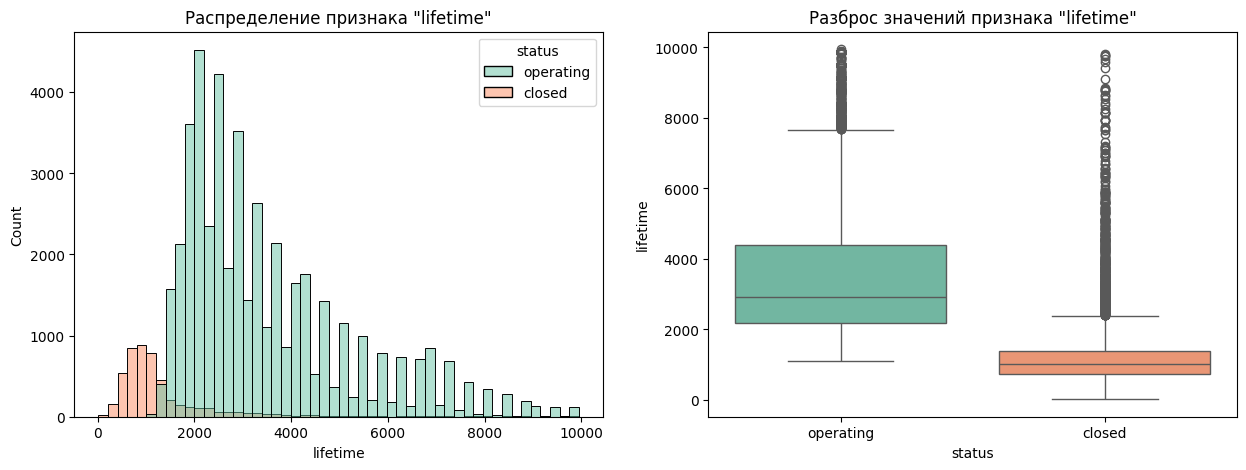

In [86]:
df_d = df_train.loc[df_train[h[1]] < 10000]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(data = df_d, x = df_d[h[1]], bins=50, ax=axes[0], hue = 'status', palette="Set2")
axes[0].set_title('Распределение признака "{}"'.format(h[1]))
sns.boxplot(data = df_d, y = df_d[h[1]], x = 'status', ax=axes[1], hue = 'status', palette="Set2")
axes[1].set_title('Разброс значений признака "{}"'.format(h[1]))
plt.show()

<div class="alert alert-info">
    Диаграмма распределения и гистограмма непрерывного признака lifetime трейновой выборки показывают, что время жизни стартапов со статусом closed 
практическ не превышает 2000 дней, а более 80 % стартапов со статусом operating имеют время жизни от 2000 до 7000 суток. Диаграммы рапределения времени
жизни стартапов имеют много выбросов выше 3200 дней (operating) и 1000 дней (closed).
</div>

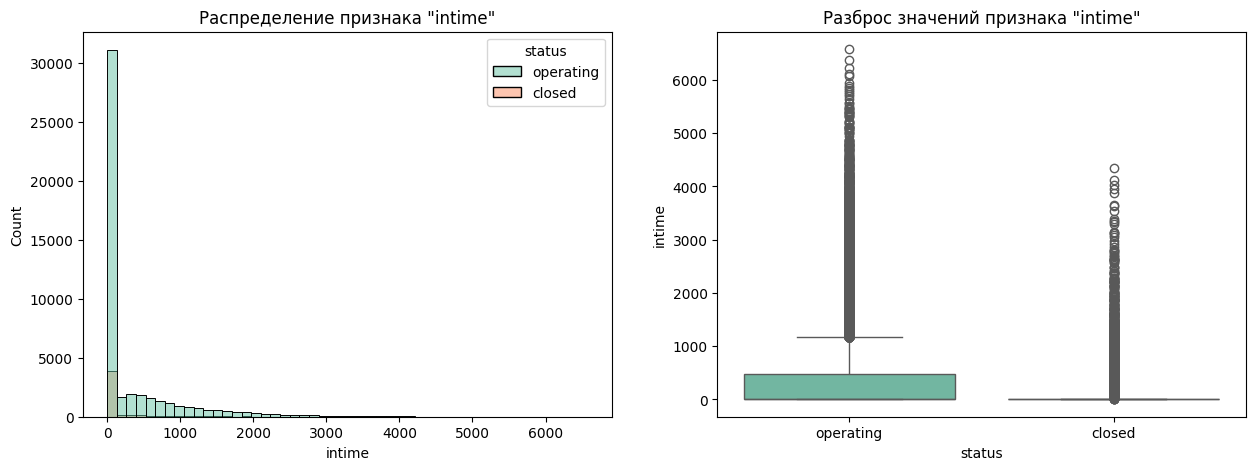

In [87]:
df_d = df_train.loc[df_train[h[2]] < 7000]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(data = df_d, x = df_d[h[2]], bins=50, ax=axes[0], hue = 'status', palette="Set2")
axes[0].set_title('Распределение признака "{}"'.format(h[2]))
sns.boxplot(data = df_d, y = df_d[h[2]], x = 'status', ax=axes[1], hue = 'status', palette="Set2")
axes[1].set_title('Разброс значений признака "{}"'.format(h[2]))
plt.show()

<div class="alert alert-info">
    Диаграмма распределения и гистограмма непрерывного признака intime трейновой выборки показывают, что время активного фандинга стартапов со 
статусом closed не превышает 200 дней, а около 20 % стартапов со статусом operating имеют время фандинга от 200 до 2000 суток. Диаграммы рапределения
периода активного фандинга стартапов имеют много выбросов выше 1000 дней (operating) и 100 дней (closed).
</div>

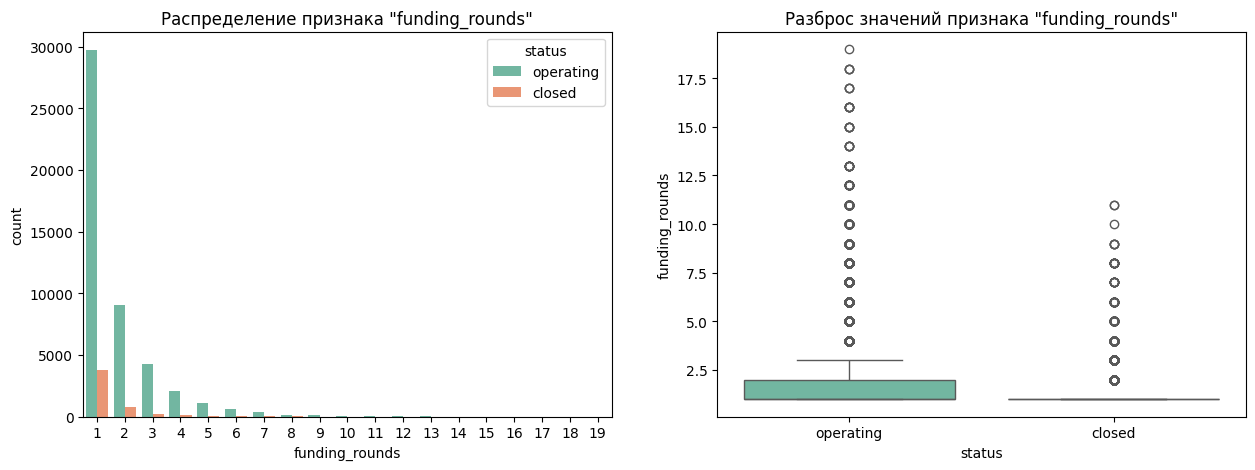

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(data = df_train, x = df_train['funding_rounds'], ax=axes[0], hue = 'status', palette="Set2")
axes[0].set_title('Распределение признака "funding_rounds"')
sns.boxplot(data = df_train, y = df_train['funding_rounds'], x = 'status', ax=axes[1], hue = 'status', palette="Set2")
axes[1].set_title('Разброс значений признака "funding_rounds"')
plt.show()

<div class="alert alert-info">
    Гистограмма и диаграмма распределения дискретного признака funding_rounds показывают, что закрывшиеся стартапы прктически не имели более 2 раундов,
а около 20 % действующих стартапов имеют более 2 раундов финансирования. Медианное число раундов для действующих стартапов порядка 2, а для 
закрытых старьапов - медиана менее 1. 
</div>

In [89]:
h1 = h + ['funding_rounds']

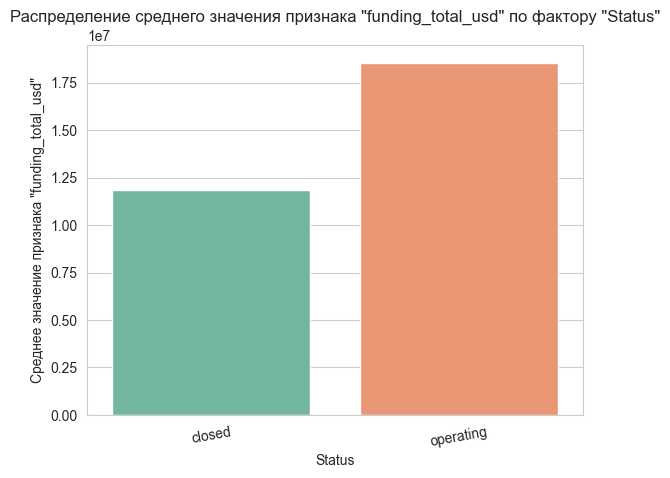

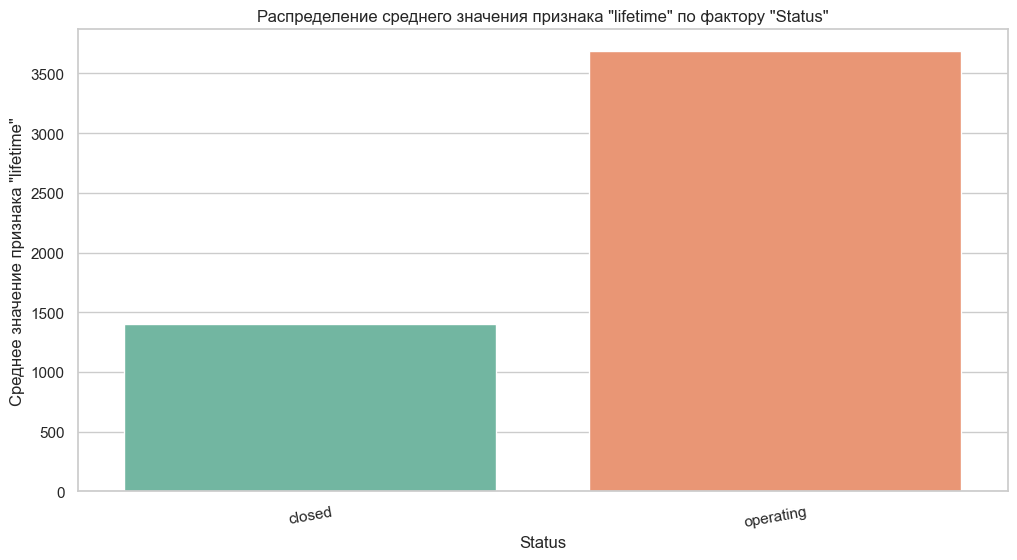

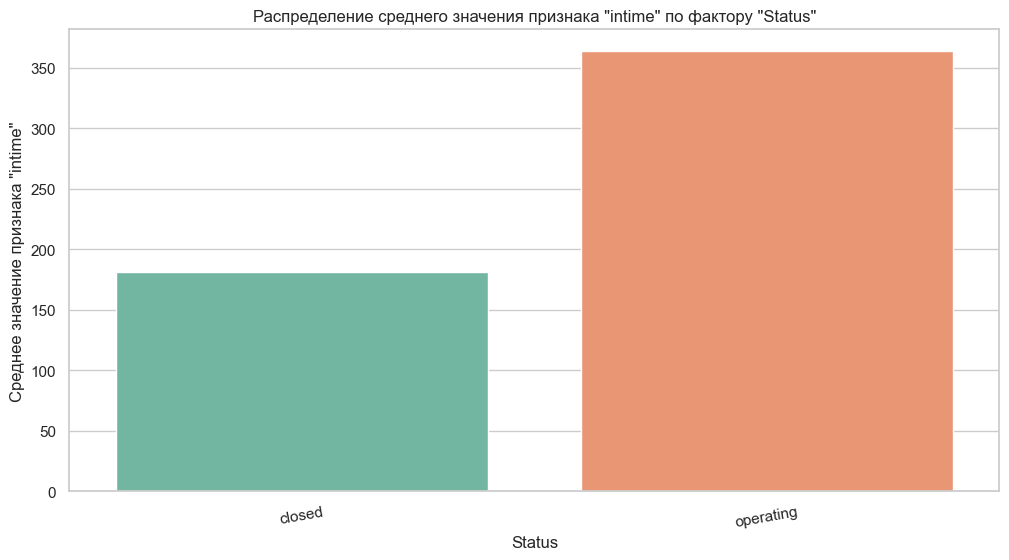

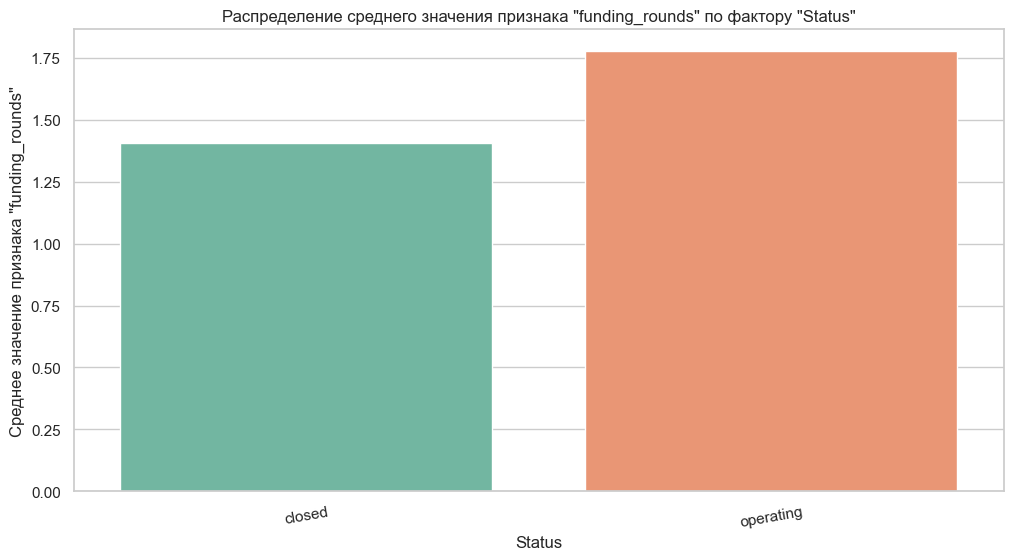

In [90]:
for i in h1:
    sns.set_style('whitegrid')
    sns.set_palette('bright')
    ax =  sns.barplot(data = df_train.groupby('status', as_index = False).agg({i:'mean'}), x = 'status', y = i, hue = 'status', palette="Set2")
    sns.set(rc={'figure.figsize':(12,6)})
    ax.set (xlabel='Status',
            ylabel='Среднее значение признака "{}"'.format(i),
            title='Распределение среднего значения признака "{}" по фактору "Status"'.format(i))  
    plt.xticks(rotation = 10)
    plt.show()

<div class="alert alert-info">
    Сравнение средних значений численных признаков для обоих статусов стартапов показывает, что средние признака funding_total_usd, lifetime и intime 
для статуса operating практически в 2, 3 и 2 раза, соответственно, превышают аналогичные значения для статуса closed, а среднее значение признака 
funding_round составляет 1,75 для статуса operating и 1,3 для статуса closed.
</div>

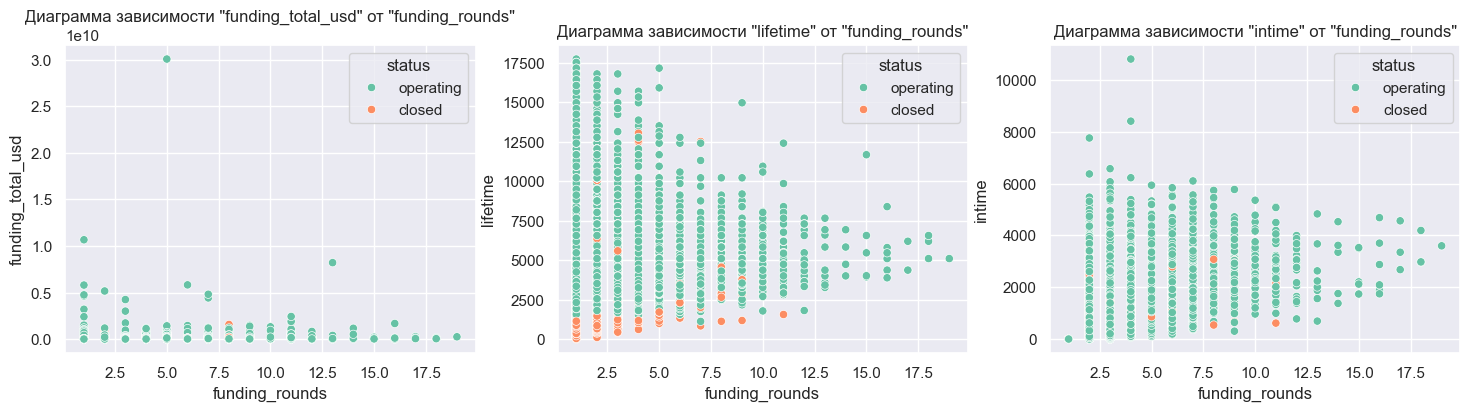

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
for i in range(len(h)):
    sns.scatterplot(data = df_train, y = h[i], x = 'funding_rounds', ax=axes[i], hue = 'status', palette="Set2")
    axes[i].set_title('Диаграмма зависимости "{}" от "funding_rounds"'.format(h[i]))

<div class="alert alert-info">
    Непрерывные числовые признаки funding_total_usd и lifetime практически не зависят от количества проведенных раундов финансирования.
</div>

C:\Users\79284\AppData\Local\Temp\ipykernel_26816\1384902824.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(),


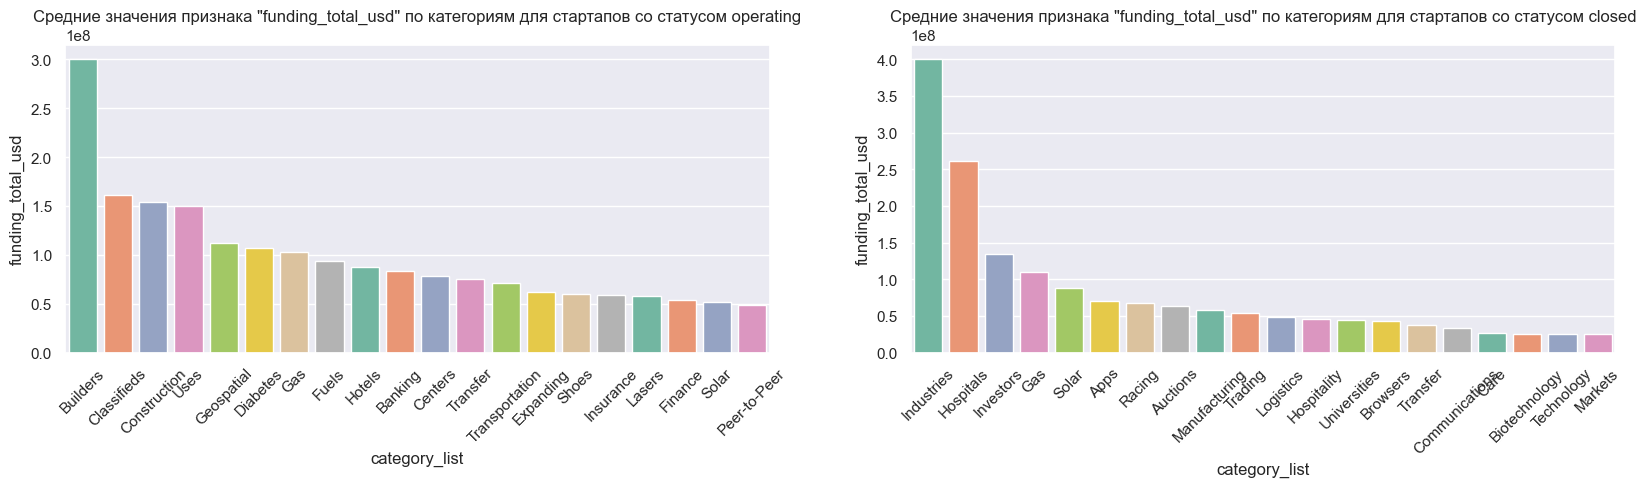

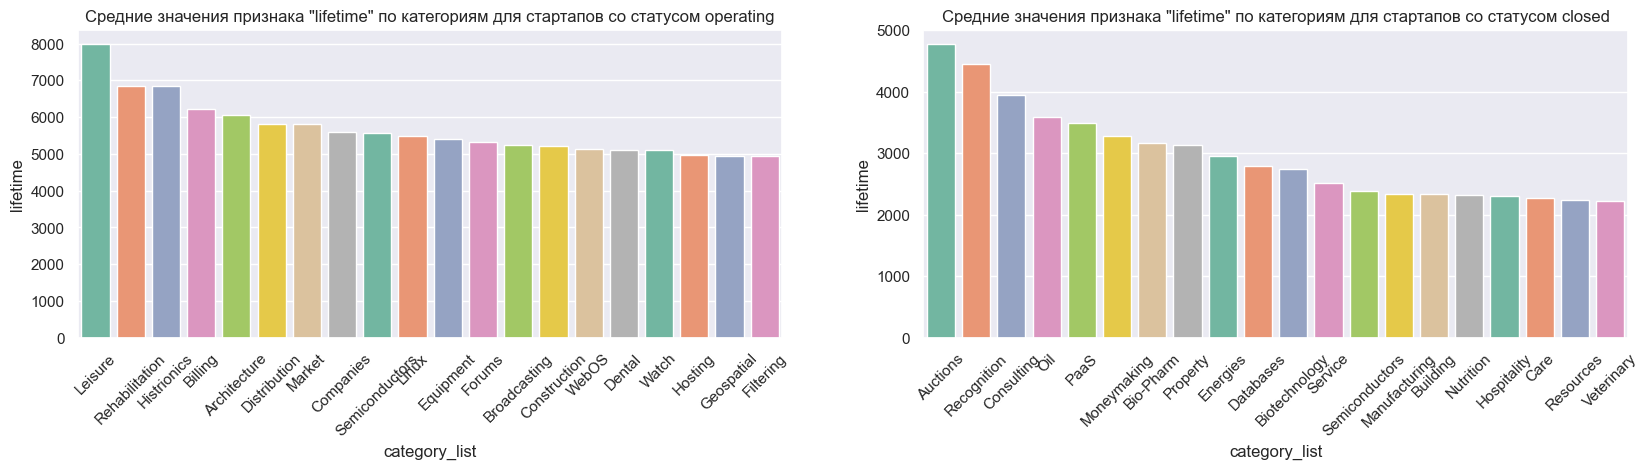

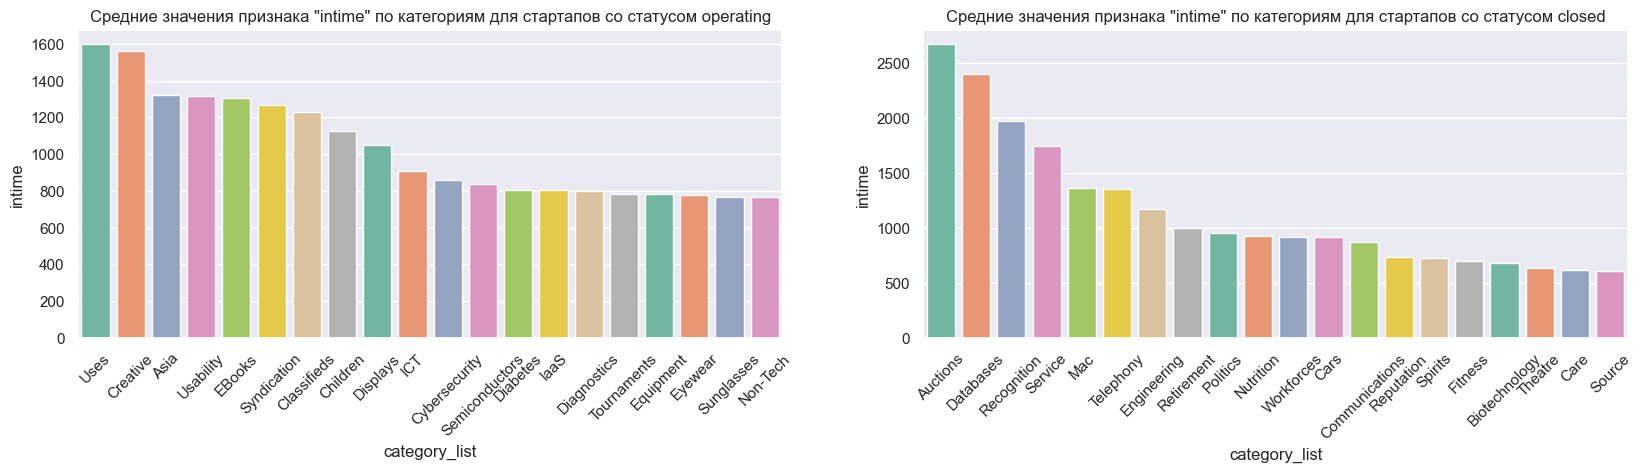

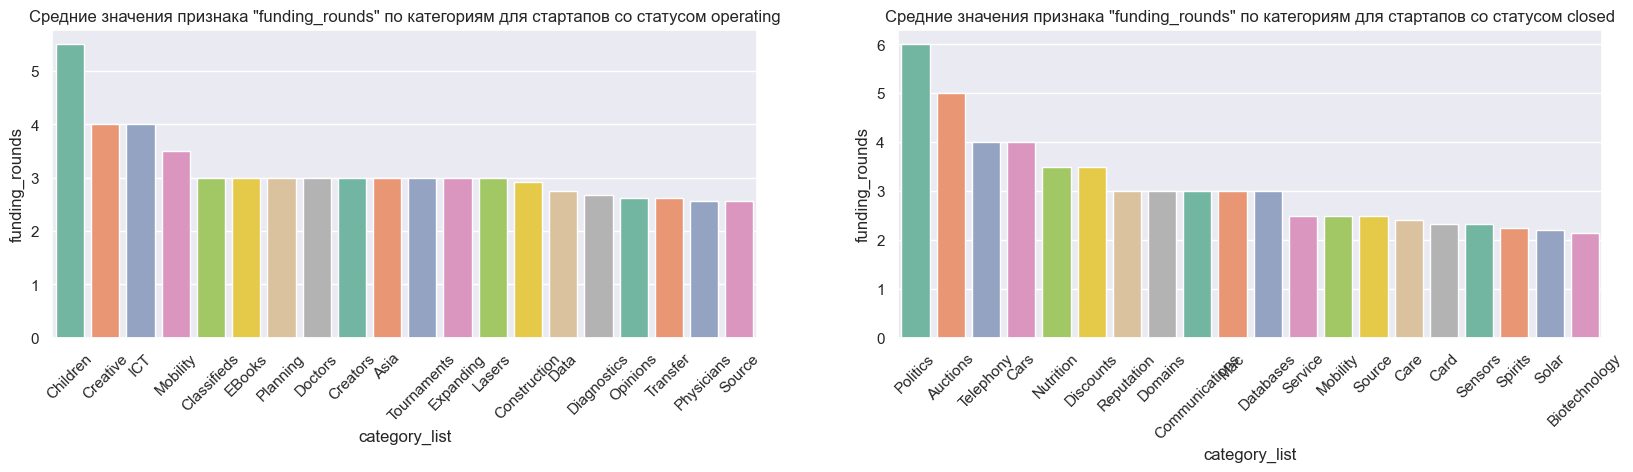

In [92]:
import warnings
for i in range(len(h1)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
    sns.barplot(data = df_train.query('status == "operating"').groupby('category_list', as_index = False).agg({h1[i]:'mean'}).sort_values(by = h1[i], ascending = False)[:20], hue = 'category_list', x = 'category_list', y = h1[i], ax=axes[0], palette="Set2")
    axes[0].set_title('Средние значения признака "{}" по категориям для стартапов со статусом operating'.format(h1[i]))
    axes[0].set_xticklabels(axes[0].get_xticklabels(),
    rotation=45)
    warnings.filterwarnings('ignore')
    sns.barplot(data = df_train.query('status == "closed"').groupby('category_list', as_index = False).agg({h1[i]:'mean'}).sort_values(by = h1[i], ascending = False)[:20], hue = 'category_list', x = 'category_list', y = h1[i], ax = axes[1], palette="Set2")
    axes[1].set_title('Средние значения признака "{}" по категориям для стартапов со статусом closed'.format(h1[i]))
    axes[1].set_xticklabels(axes[1].get_xticklabels(),
    rotation=45)
    warnings.filterwarnings('ignore')

<div class="alert alert-info">
    Рассмотрены 20 категорий с максимальными средними значениями числовых признаков стартапов со статусом operating и closed. Для статуса operating 
наибольшую среднюю капителизацию имеет категория Bilders (для статуса closed - категория Indistries). Наибольшее среднее время жизни имеют стартапы 
категории Leisure для статуса operating и Auctions - для статуса closed. Наибольшее среднее количество раундов было у стартапов категории Children
(operating) и Politics (closed). 
</div>

In [93]:
phik_overview = df_train.drop(['name', 'closed_at', 'city', 'first_funding_at', 'last_funding_at', 'founded_at', 'city', 'region'], axis = 1).phik_matrix(interval_cols=h1)
phik_overview.shape

(8, 8)

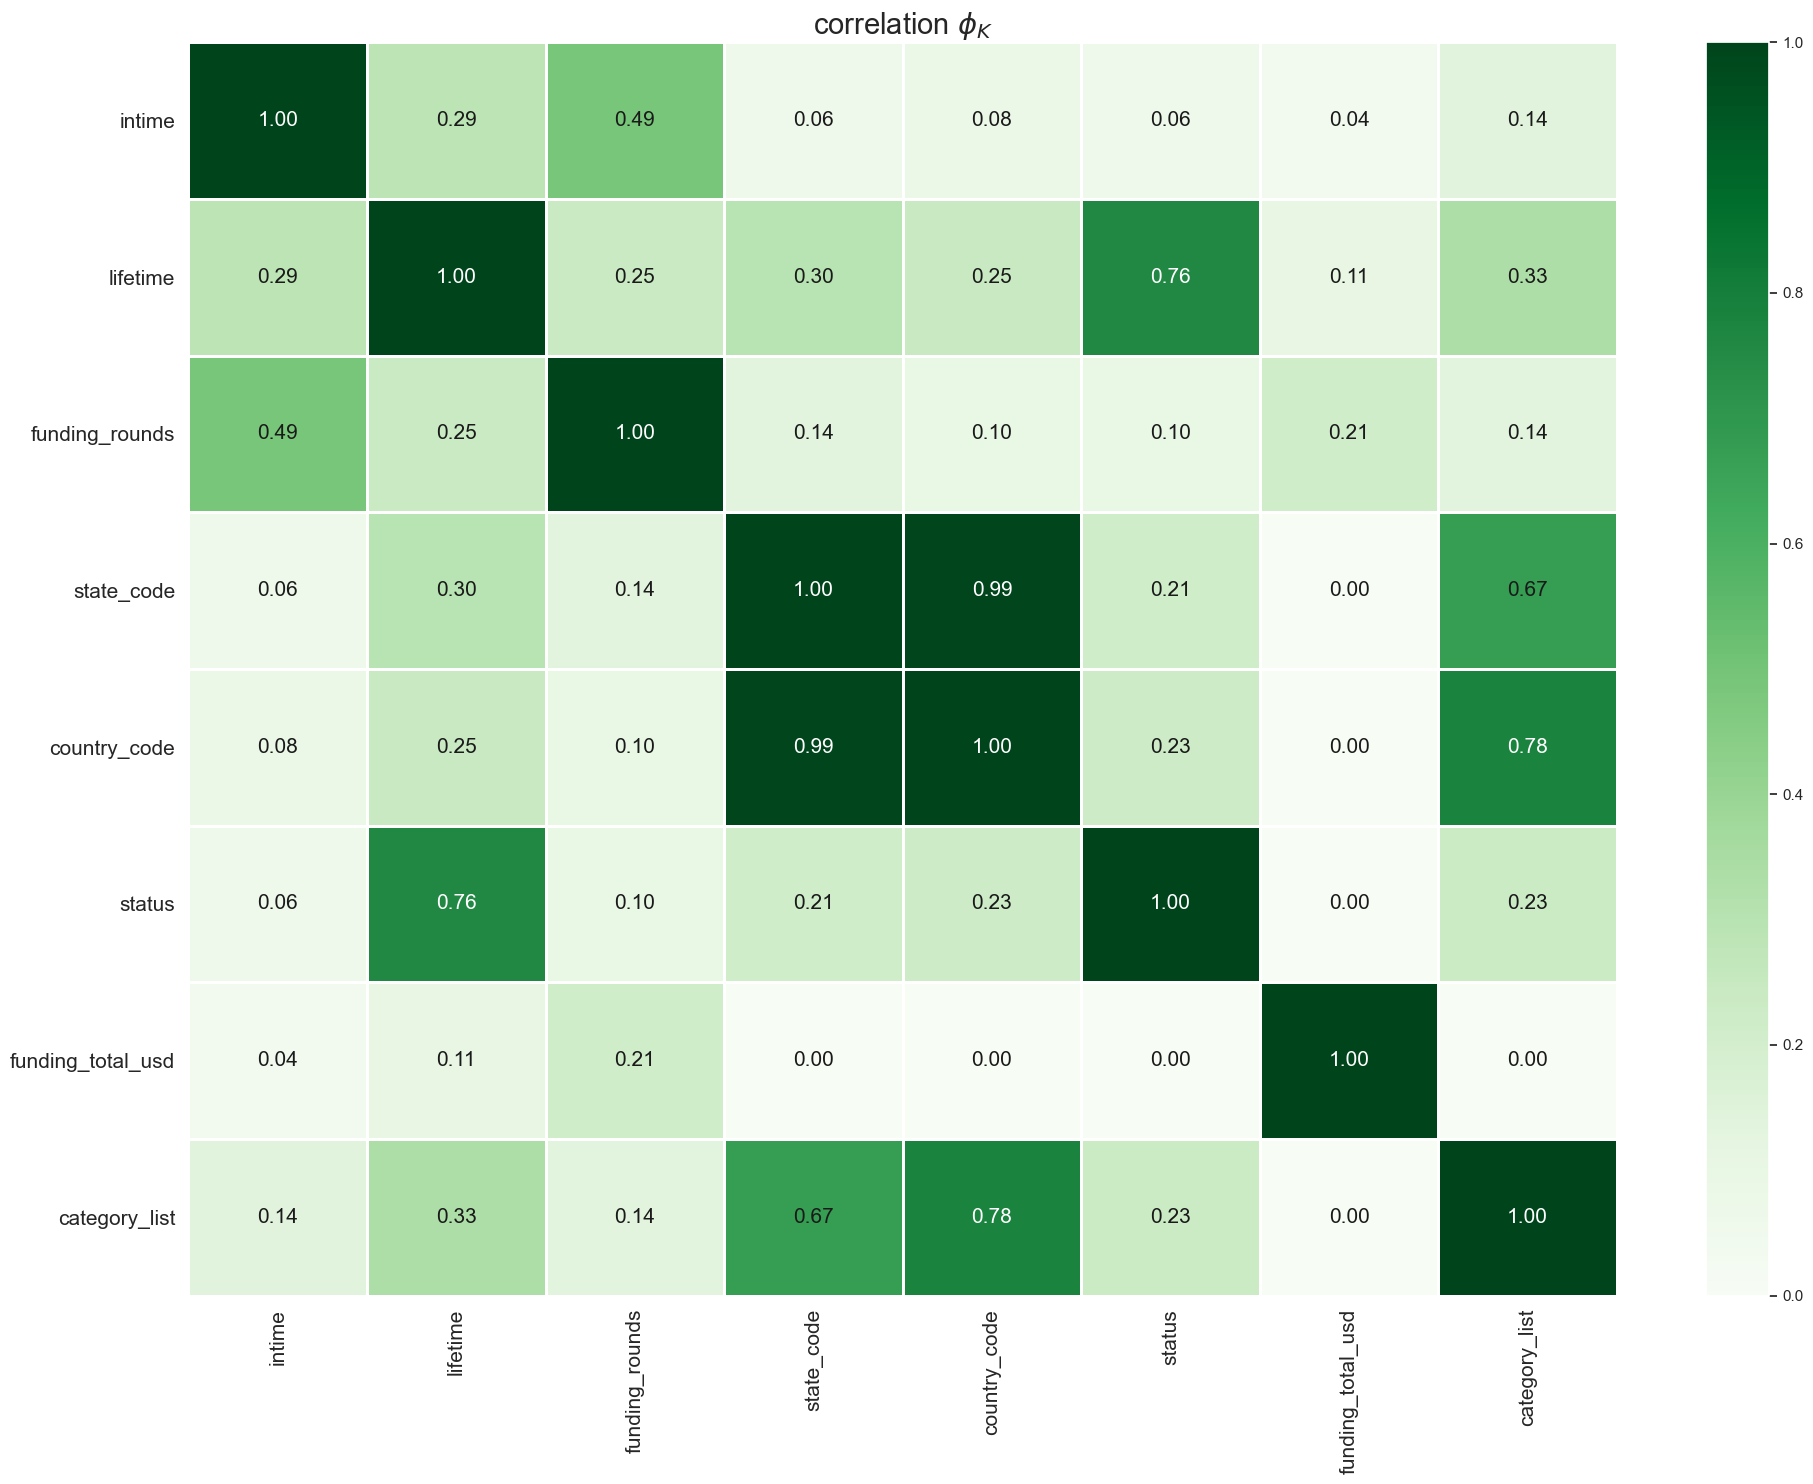

In [94]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<div class="alert alert-info">
    Матрица корреляции phik показывает отсутствие сильной корреляции между парами признаков, а также в парах признаков и цели за исключением пары 
country_code - state_code, где коэф корреляции составляет 0,99. Поэтому для моделирования оставляем только признак country_code. Из рассмотренных 
признаков на цель в наибольшей степени влияет lifetime (0.76), а признак funding_total_usd не влияет на цель.  
</div>

In [95]:
label_encoder = LabelEncoder()
df_train['status'] = label_encoder.fit_transform(df_train['status'])
df_train['status'].value_counts()

status
1    47599
0     4917
Name: count, dtype: int64

<div class="alert alert-info">
    Целевой признак status закодирован с помощью метода LabelEncoder.
</div>

In [96]:
h2 = h1 + ['status']

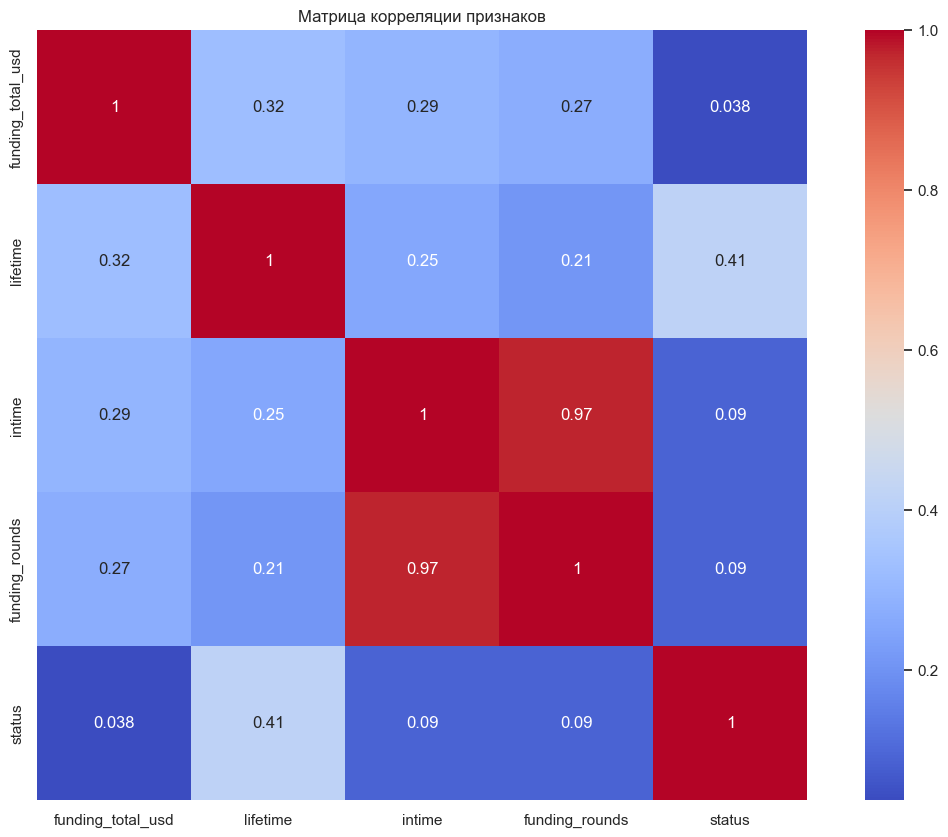

In [97]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train[h2].corr(method = 'spearman'), annot = True, square = True, cmap='coolwarm')
plt.title('Матрица корреляции признаков');

<div class="alert alert-info">
    Так как распределение числовых признаков отличается от нормального, то корреляция между ними проверена рассчетом коэффициентов Спирмена. Данный 
подход позволяет выявить небольшую корреляцию между целью и funding_total_usd (0,09). Также выявляется весьма сильная взаимная корреляция между
промежутком времени между первым и последним раундами (intime ) и числом раундов (funding_rounds), но так как эти признаки распределены нормально и
показывают весьма умеренную корреляцию Пирсона по версии phik-матрицы (0,49), то исключать какой-либо из них не стоит. 
</div>

In [98]:
y, X = dmatrices('status ~ funding_total_usd + lifetime + intime + funding_rounds', data=df_train, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Признаки'] = X.columns
vif

,VIF,Признаки
0,5.816078,Intercept
1,1.016601,funding_total_usd
2,1.079702,lifetime
3,2.581388,intime
4,2.475261,funding_rounds


<div class="alert alert-info">
    Степень взаимной корреляции количественных признаков проверена с помощью оценки для каждого признака коэффициента инфляции
дисперсии (VIF), который характеризует степень корреляции между данным признаком и другими признаками модели. Проверка 
показала, что коэффициенты VIF для всех факторов существенно меньше 5 (лежат в пределах 1 - 2,5), что означает умеренную
взаимнную корреляцию, которая недостаточно велика, чтобы повлиять на надежность модели.
</div>

## Отбор и кодирование признаков для моделирования 
   <a id="start2"></a>

In [99]:
y_train = df_train['status']

In [100]:
ohe_columns = ['country_code', 'category_list']
ord_columns = ['funding_rounds']
num_columns = ['lifetime', 'intime', 'funding_total_usd']

In [101]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [102]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    list(range(1, len(df_train['funding_rounds'].unique())+1))
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [103]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [104]:
X_train = df_train.drop(['name', 'closed_at', 'city', 'first_funding_at', 'last_funding_at', 'founded_at', 'city', 'region', 'state_code', 'status'], axis = 1)

In [105]:
X_train.columns

Index(['category_list', 'funding_total_usd', 'country_code', 'funding_rounds',
       'lifetime', 'intime'],
      dtype='object')

In [106]:
X_test = df_test.drop(['name', 'city', 'first_funding_at', 'last_funding_at', 'city', 'region', 'state_code'], axis = 1)

In [107]:
X_test.columns

Index(['category_list', 'funding_total_usd', 'country_code', 'funding_rounds',
       'lifetime', 'intime'],
      dtype='object')

In [108]:
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 

In [109]:
X_train_p.isna().sum()

ohe__country_code_ARE     0
ohe__country_code_ARG     0
ohe__country_code_ARM     0
ohe__country_code_AUS     0
ohe__country_code_AUT     0
                         ..
ohe__category_list_nan    0
ord__funding_rounds       0
num__lifetime             0
num__intime               0
num__funding_total_usd    0
Length: 631, dtype: int64

In [110]:
X_test_p.isna().sum()

ohe__country_code_ARE     0
ohe__country_code_ARG     0
ohe__country_code_ARM     0
ohe__country_code_AUS     0
ohe__country_code_AUT     0
                         ..
ohe__category_list_nan    0
ord__funding_rounds       0
num__lifetime             0
num__intime               0
num__funding_total_usd    0
Length: 631, dtype: int64

<div class="alert alert-info">
    Для моделирования текущего статуса стартапов были выбраны следующие признаки: country_code, category_list (ohe_encoder); funding_ruonds 
(ord_encoder); lifetime, intime, funding_total_usd.
</div>

## Обучение моделей
   <a id="start3"></a>

In [111]:
RANDOM_STATE = 42

In [112]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [113]:


param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    {
        'models': [Lasso(
            random_state=RANDOM_STATE
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [Ridge(
            random_state=RANDOM_STATE
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [114]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='accuracy',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [115]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['country_code',
                                                                                'category_list']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('si...
                                         'models__min_samples_leaf': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [GradientBoostingClassifier(random_state=42)],
                                         'models__max_depth': range(2, 20),
                                         'models__max_features': range(2, 20),
                                         'models__min_samples_leaf': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='accuracy')

In [116]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['country_code',
                                                   'category_list']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImpu...
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
                                                                                               18,
                                                                                               19]],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funding_rounds']),
                                                 ('num', 'passthrough',
                                                  ['lifetime', 'intime',
                                                   'funding_total_usd'])])),
                ('models',
                 GradientBoostingClassifier(max_depth=14, max_features=11,
                                            min_samples_leaf=7,
                                            random_state=42))])

In [117]:
randomized_search.best_score_

0.9716466912329622

In [118]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_)[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
    ].sort_values('rank_test_score')

,rank_test_score,param_models,mean_test_score,params
0,1,GradientBoostingClassifier(random_state=42),0.971647,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 7, 'models__max_features': 11, 'models__max_depth': 14, 'models': GradientBoostingClassifier(random_state=42)}"
7,2,GradientBoostingClassifier(random_state=42),0.969838,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 8, 'models__max_depth': 11, 'models': GradientBoostingClassifier(random_state=42)}"
4,3,GradientBoostingClassifier(random_state=42),0.966220,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 7, 'models__max_features': 6, 'models__max_depth': 10, 'models': GradientBoostingClassifier(random_state=42)}"
8,4,DecisionTreeClassifier(random_state=42),0.910446,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 1, 'models__max_features': 18, 'models__max_depth': 14, 'models': DecisionTreeClassifier(random_state=42)}"
3,5,DecisionTreeClassifier(random_state=42),0.907742,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 6, 'models__max_features': 3, 'models__max_depth': 13, 'models': DecisionTreeClassifier(random_state=42)}"
1,6,RandomForestClassifier(random_state=42),0.906371,"{'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 7, 'models__max_features': 8, 'models__max_depth': 16, 'models': RandomForestClassifier(random_state=42)}"
2,6,DecisionTreeClassifier(random_state=42),0.906371,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 15, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}"
5,6,RandomForestClassifier(random_state=42),0.906371,"{'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 8, 'models__max_features': 10, 'models__max_depth': 8, 'models': RandomForestClassifier(random_state=42)}"
6,6,RandomForestClassifier(random_state=42),0.906371,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 6, 'models__max_features': 3, 'models__max_depth': 7, 'models': RandomForestClassifier(random_state=42)}"
9,6,RandomForestClassifier(random_state=42),0.906371,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 7, 'models__max_features': 11, 'models__max_depth': 18, 'models': RandomForestClassifier(random_state=42)}"


In [119]:
y_test_pred =  randomized_search.predict(X_test)

<div class="alert alert-info">
    Для сравнения в пайплане выбраны линейные модели классификации Lasso, Ridge, модель логистической регрессии, дерево решений и ансамбли
деревьев RandomForest и GradientBoosting. Лучшую метрику accuracy на кросс-валидации имеет модель GradientBoosting со следующими
гиперпараметрами: 'models__min_samples_leaf' = 7, 'models__max_features' = 11, 'models__max_depth' = 14. Среднее значение метрики accuracy при 
кросс-валидации с применением метода RandomizedSearchCV() для данной модели равно 0,97. В 10 лучших моделей входит модель DecisionTreeClassifier
(4 место) со средней величиной метрики 0,91 и модель RandomForestClassifier (6 место) с метрикой 0,905. 
</div>

In [120]:
dummy_class = DummyClassifier(random_state=RANDOM_STATE)

In [121]:
TEST_SIZE = 0.25
X_train_n, X_valid, y_train_n, y_valid = train_test_split(
    X_train_p,
    y_train,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y_train)

In [122]:
dummy_class.fit(X_train_n, y_train_n)

DummyClassifier(random_state=42)

In [123]:
y_test_dummy = dummy_class.predict(X_valid)

In [124]:
accuracy_score(y_valid, y_test_dummy)

0.9063904333917282

<div class="alert alert-info">
    Обучение dummy-модели, присваивающей всем объектам случайное значение цели в ссответствии с соотношением классов, показывает метрику 0,906, что
ниже, чем значение метрики лучшей модели GradientBoostingClassifier. Поэтому поиск лучшей модели методом кросс-валидации прошел относительно
успешно.
</div>

In [125]:
model = randomized_search.best_estimator_.named_steps['models']

In [126]:
model.feature_importances_

array([3.22949182e-05, 0.00000000e+00, 0.00000000e+00, 3.81201807e-05,
       1.75383844e-05, 0.00000000e+00, 0.00000000e+00, 3.04844726e-05,
       0.00000000e+00, 3.80269882e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.02470638e-05,
       0.00000000e+00, 0.00000000e+00, 9.29665904e-05, 1.00810820e-02,
       9.83533361e-05, 4.17836145e-04, 0.00000000e+00, 3.60189999e-07,
       0.00000000e+00, 9.35071302e-07, 3.70165656e-05, 1.08890440e-05,
       8.20033344e-05, 3.82413210e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.57581662e-05, 2.42321145e-05, 4.87273171e-06,
       1.98149471e-05, 3.08474730e-05, 1.23041017e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.55342677e-05, 0.00000000e+00,
       1.71148129e-06, 0.00000000e+00, 1.63453205e-06, 8.44143055e-04,
       3.50805514e-05, 0.00000000e+00, 0.00000000e+00, 3.12575330e-05,
      

In [127]:
feature_importance = pd.DataFrame({'Feature': X_train_p.columns, 'Importance': np.abs(model.feature_importances_)})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)[:10]

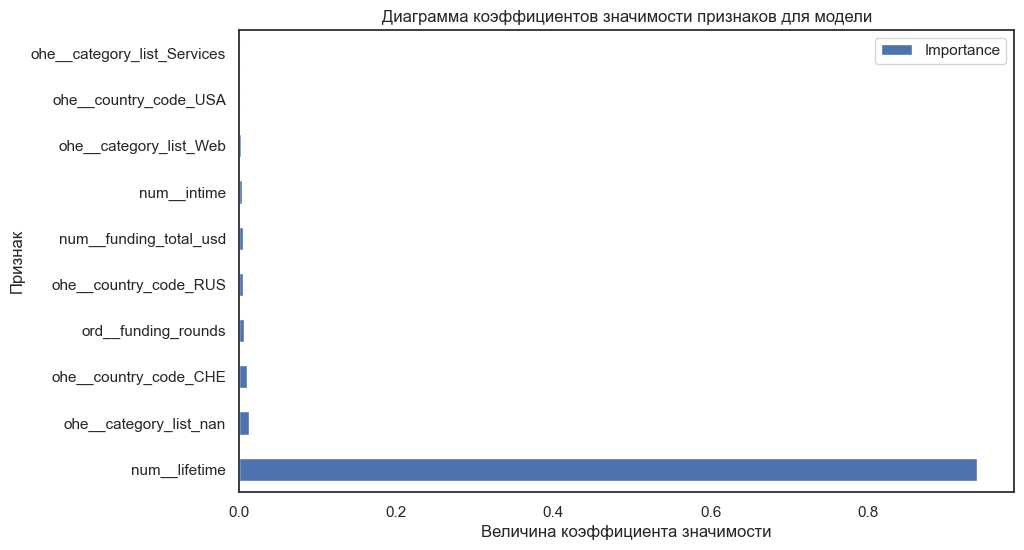

In [128]:
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Диаграмма коэффициентов значимости признаков для модели')
plt.xlabel('Величина коэффициента значимости')
plt.ylabel('Признак');

<div class="alert alert-info">
    Изучение значимости признаков для лучшей модели показывает, что наибольший вклад вкоассификацию с большим отрывом вносит 
признак 'lifetime' (около 0,95). Вклад остальных признаков несущественен. 
</div>

In [129]:
df_train['fund_rounds'] = df_train['funding_total_usd']/df_train['lifetime']

In [130]:
df_train['time_ratio'] = df_train['intime']/df_train['lifetime']

In [131]:
df_test['fund_rounds'] = df_test['funding_total_usd']/df_test['lifetime']

In [132]:
df_test['time_ratio'] = df_test['intime']/df_test['lifetime']

<div class="alert alert-info">
    Так как признак 'lifetime' имеет несоизмеримо большее влияние на цель, чем остальные признаки, то введены новые удельные признаки, связанные с 
ключевым признаком 'lifetime'.
</div>

In [133]:
ord_columns = ['funding_rounds']
num_columns = ['lifetime', 'intime', 'funding_total_usd', 'fund_rounds', 'time_ratio']

In [134]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    list(range(1, len(df_train['funding_rounds'].unique())+1))
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [135]:
data_preprocessor = ColumnTransformer(
    [
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [136]:
X_train = df_train.drop(['name', 'closed_at', 'city', 'first_funding_at', 'last_funding_at', 'founded_at', 'city', 'region', 'state_code', 'status', 'country_code', 'category_list'], axis = 1)

In [137]:
X_train.columns

Index(['funding_total_usd', 'funding_rounds', 'lifetime', 'intime',
       'fund_rounds', 'time_ratio'],
      dtype='object')

In [138]:
X_test = df_test.drop(['name', 'city', 'first_funding_at', 'last_funding_at', 'city', 'region', 'state_code', 'country_code', 'category_list'], axis = 1)

In [139]:
X_test.columns

Index(['funding_total_usd', 'funding_rounds', 'lifetime', 'intime',
       'fund_rounds', 'time_ratio'],
      dtype='object')

In [140]:
X_train_pp = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_pp = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 

In [141]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [142]:


param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    {
        'models': [Lasso(
            random_state=RANDOM_STATE
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [Ridge(
            random_state=RANDOM_STATE
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [143]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='accuracy',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [144]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ord',
                                                                                                OrdinalEncoder(categories=[[1,
                                                                                                                            2,
                                                                                                                            3,
                                                                                                                            4,
                                                                                                                            5,
                                                                                                                            6,
                                                                                                                            7,
                                                                                                                            8,
                                                                                                                            9,
                                                                                                                            10,
                                                                                                                            11,
                                                                                                                            12,
                                                                                                                            13,
                                                                                                                            14,
                                                                                                                            15,
                                                                                                                            16,
                                                                                                                            17,
                                                                                                                            18,
                                                                                                                            19]],
                                                                                                               handle_unknown='use_encoded_value',
                                                                                                               unknown_value=na...
                                         'models__min_samples_leaf': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [GradientBoostingClassifier(random_state=42)],
                                         'models__max_depth': range(2, 20),
                                         'models__max_features': range(2, 20),
                                         'models__min_samples_leaf': range(1, 10),
           

In [145]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8,
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
                                                                                               18,
                                                                                               19]],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['funding_rounds']),
                                                 ('num', 'passthrough',
                                                  ['lifetime', 'intime',
                                                   'funding_total_usd',
                                                   'fund_rounds',
                                                   'time_ratio'])])),
                ('models',
                 GradientBoostingClassifier(max_depth=10, max_features=6,
                                            min_samples_leaf=7,
                                            random_state=42))])

In [146]:
randomized_search.best_score_

0.9739888537993604

In [147]:
model_n = randomized_search.best_estimator_.named_steps['models']

In [148]:
feature_importance = pd.DataFrame({'Feature': X_train_pp.columns, 'Importance': np.abs(model_n.feature_importances_)})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)[:10]

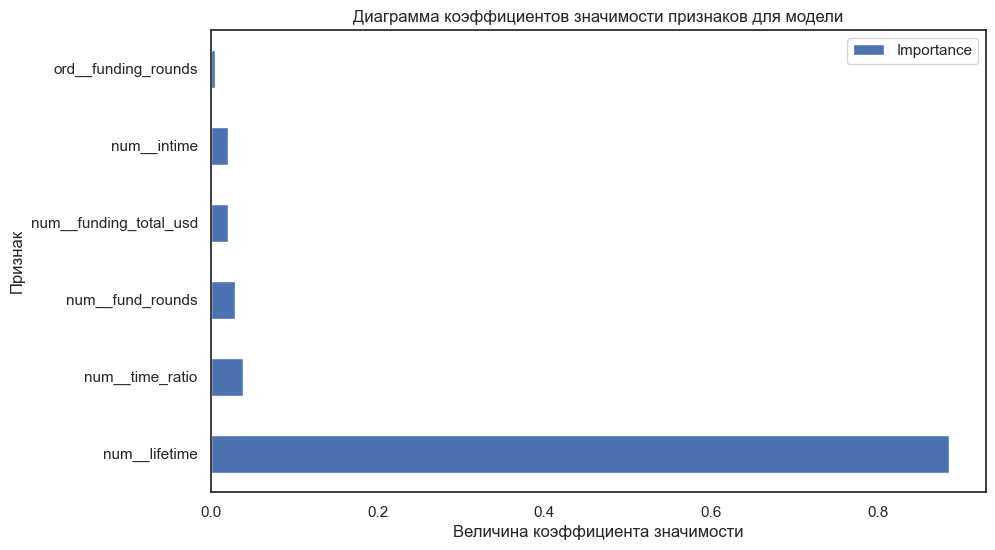

In [149]:
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Диаграмма коэффициентов значимости признаков для модели')
plt.xlabel('Величина коэффициента значимости')
plt.ylabel('Признак');

<div class="alert alert-info">
    В новой модели убрали слабо влияющие на цель категориальные признаки и добавили производные числовые признаки. В результате метрика на 
кросс-валидации увеличилась до 0,974. Доминация признака lifetime немного снижена, а 2 и 3 места занимают производные признаки time_ratio и 
fund_rounds.
</div>

In [150]:
y_test_pred =  randomized_search.predict(X_test)

In [151]:
df_test['status'] = y_test_pred

In [152]:
df_test['status'].value_counts()

status
1    11209
0     1916
Name: count, dtype: int64

<div class="alert alert-info">
    Расчетный столбец 'status' был добавлен в тестовую выборку.
</div>

## Выводы
   <a id="start4"></a>

<div class="alert alert-info"> 
 
<b>Загрузка и предобработка данных</b>
     После изучения трейновых и тестовых данных видно, что все типы данных, кроме даты (поля first_funding_at и last_funding_at) указаны верно. Во всех
полях, кроме дат, времени жизни компании и числа раундов  инвестирования, есть пропуски. В трейновых данных есть поле closed_at, которое отсутствует в 
тестовых данных. С другой стороны, в тестовых данных есть поле lifetime (время жизни компании в днях), которого нет в трейновом датасете. 
     Дубликаты данных в обоих датасетах отсутствауют.
     Поля с датами в трейновом и тестовом датасетах переведены в тип datetime. В трейновом датасете создано поле lifetime, определяющее число дней 
жизни компании.
     В поле category_list трейновой выборки количество уникальных объектов сокращено с 22016 до 495. Пропуски заполнены модой.
     Оставшиеся пропуски в поле funding_total_usd были заполнены на основании выявленной слабой корреляции между полями funding_total_usd и 
funding_rounds.
     Пропуски в поле funding_total_usd тестовой выборки были заполнены средними значениями, определенными для каждой категории. После этого осталось 
14 пропусков.
     Оставшиеся пропуски в поле funding_total_usd тестовой выборки были заполнены на основании выявленной слабой корреляции между полями 
funding_total_usd и funding_rounds.
     В трейновой и тестовой выборках пропуски в поле country_code были заполнены на основании известных значений в поле state_code, соотвествующих
данному значению в поле country_code.
     В трейновой и тестовой выборках пропуски в поле state_code были заполнены на оснговании соответствия значениям в поле region. Это позволило снизить
число пропусков в 10 раз. Оставшиеся пропуски заполены модой для соответствующих значений в поле country_code.
     В трейновой и тестовой выборках пропуски в полях region и city были заполнены модами для соотвествующих значений поля country_code.
     
<b> Исследовательский анализ данных </b>

     Построены гистограмма и диаграмма распределения для непрерывного признака funding_total_usd с разбивкой по фактору status. Видно, что медитанное
значение funding_total_usd для стартапов со статусом operating составляет около 500000 и превышает аналогичное значение для стартапов со статусом
closed. Порядка 50 % стартапов со статусом opera
ting имеют размер фонда более 1 млн. 50 % стартапов со статусом closed имеют размер фонда менее 0,5 млн. 
     Диаграмма распределения и гистограмма непрерывного признака lifetime трейновой выборки показывают, что время жизни стартапов со статусом closed 
практическ не превышает 2000 дней, а более 80 % стартапов со статусом operating имеют время жизни от 2000 до 7000 суток. Диаграммы рапределения времени
жизни стартапов имеют много выбросов выше 3200 дней (operating) и 1000 дней (closed).
     Диаграмма распределения и гистограмма непрерывного признака intime трейновой выборки показывают, что время активного фандинга стартапов со 
статусом closed не превышает 200 дней, а около 20 % стартапов со статусом operating имеют время фандинга от 200 до 2000 суток. Диаграммы рапределения
периода активного фандинга стартапов имеют много выбросов выше 1000 дней (operating) и 100 дней (closed).
    Гистограмма и диаграмма распределения дискретного признака funding_rounds показывают, что закрывшиеся стартапы прктически не имели более 2 раундов,
а около 20 % действующих стартапов имеют более 2 раундов финансирования. Медианное число раундов для действующих стартапов порядка 2, а для 
закрытых старьапов - медиана менее 1. 
    Сравнение средних значений численных признаков для обоих статусов стартапов показывает, что средние признака funding_total_usd, lifetime и intime 
для статуса operating практически в 2, 3 и 2 раза, соответственно, превышают аналогичные значения для статуса closed, а среднее значение признака 
funding_round составляет 1,75 для статуса operating и 1,3 для статуса closed.
    Непрерывные числовые признаки funding_total_usd и lifetime практически не зависят от количества проведенных раундов финансирования.
     Рассмотрены 20 категорий с максимальными средними значениями числовых признаков стартапов со статусом operating и closed. Для статуса operating 
наибольшую среднюю капителизацию имеет категория Bilders (для статуса closed - категория Indistries). Наибольшее среднее время жизни имеют стартапы 
категории Leisure для статуса operating и Auctions - для статуса closed. Наибольшее среднее количество раундов было у стартапов категории Children
(operating) и Politics (closed). 
     Матрица корреляции phik показывает отсутствие сильной корреляции между парами признаков, а также в парах признаков и цели за исключением пары 
country_code - state_code, где коэф корреляции составляет 0,99. Поэтому для моделирования оставляем только признак country_code. Из рассмотренных 
признаков на цель в наибольшей степени влияет lifetime (0.76), а признак funding_total_usd не влияет на цель.  
    Так как распределение числовых признаков отличается от нормального, то корреляция между ними проверена рассчетом коэффициентов Спирмена. Данный 
подход позволяет выявить небольшую корреляцию между целью и funding_total_usd (0,09). Также выявляется весьма сильная взаимная корреляция между
промежутком времени между первым и последним раундами (intime ) и числом раундов (funding_rounds), но так как эти признаки распределены нормально и
показывают весьма умеренную корреляцию Пирсона по версии phik-матрицы (0,49), то исключать какой-либо из них не стоит. 
     Степень взаимной корреляции количественных признаков проверена с помощью оценки для каждого признака коэффициента инфляции
дисперсии (VIF), который характеризует степень корреляции между данным признаком и другими признаками модели. Проверка 
показала, что коэффициенты VIF для всех факторов существенно меньше 5 (лежат в пределах 1 - 2,5), что означает умеренную
взаимнную корреляцию, которая недостаточно велика, чтобы повлиять на надежность модели.

<b> Отбор, кодирование признаков для моделирования и обученние моделей </b>

     Для моделирования текущего статуса стартапов были выбраны следующие признаки: country_code, category_list (ohe_encoder); funding_ruonds 
(ord_encoder); lifetime, intime, funding_total_usd.
     Для сравнения в пайплане выбраны линейные модели классификации Lasso, Ridge, модель логистической регрессии, дерево решений и ансамбли
деревьев RandomForest и GradientBoosting. Лучшую метрику accuracy на кросс-валидации имеет модель GradientBoosting со следующими
гиперпараметрами: 'models__min_samples_leaf' = 7, 'models__max_features' = 11, 'models__max_depth' = 14. Среднее значение метрики accuracy при 
кросс-валидации с применением метода RandomizedSearchCV() для данной модели равно 0,97. В 10 лучших моделей входит модель DecisionTreeClassifier
(4 место) со средней величиной метрики 0,91 и модель RandomForestClassifier (6 место) с метрикой 0,905. 
     Обучение dummy-модели, присваивающей всем объектам случайное значение цели в ссответствии с соотношением классов, показывает метрику 0,906, что
ниже, чем значение метрики лучшей модели GradientBoostingClassifier. Поэтому поиск лучшей модели методом кросс-валидации прошел относительно
успешно.
     Изучение значимости признаков для лучшей модели показывает, что наибольший вклад вкоассификацию с большим отрывом вносит 
признак 'lifetime' (около 0,95). Вклад остальных признаков несущественен. 
     Так как признак 'lifetime' имеет несоизмеримо большее влияние на цель, чем остальные признаки, то введены новые удельные признаки, связанные с 
ключевым признаком 'lifetime'.
     В новой модели убрали слабо влияющие на цель категориальные признаки и добавили производные числовые признаки. В результате метрика на 
кросс-валидации увеличилась до 0,974. Доминация признака lifetime немного снижена, а 2 и 3 места занимают производные признаки time_ratio и 
fund_rounds.
     Расчтенй столбец 'status' был добавлен в тестовую выборку.
     
 